In [11]:
import math as m
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *

### Cohort 1; Group 7
#### Aliaksei Kanstantsinau, Weixia Cheng, Simon Geller, Mengxiao Li, Darshan Parvadiya

##### Problem 1

In [3]:
# Assume semiannual compounding and FV 100. 
# Coupon payment 10%/2
c = 5
# Semi-annual compounding rate 2%/2.
r = .01
# Semi-annual coupon payments 25(y)*2.
n = 50
# Bond Price. Discount FV using 2% yield and 25y. 
# Use the PV of the Annuity formula. 
b = (c/r)*(1-(1/(1+r)**n)) + 100/(1+.02)**25

print('$', round(b, 2))

$ 256.93


##### Problem 2

In [4]:
# Initial Amount to $25k
m = 25000
# Rate
r = .04
# Period
t = 10
# Calculate the amounts for both options
o1 = m*(1+r)**t
o2 = m*(1+r/12)**(t*12)

print('First National Bank:  $', round(o1, 2)) 
print('Off-Shore Financing Bank:  $', round(o2, 2))

First National Bank:  $ 37006.11
Off-Shore Financing Bank:  $ 37270.82


##### Problem 3


In [5]:
# Down Payment
d = 180000
# Monthly Payment
c = 7000
# Rate (Prorated for monthly compounding)
r = .055/12
# Term
t = 240
# Calculate the final sum. 
# Prorate down payment and add FV of the annuity for t-1 (EOM Payment). 
s = (c/r)*((1+r)**(t)-1) + d*(1+r)**t

print('$', round(s, 2))

$ 3588784.37


##### Problem 4


In [6]:
# Down Payment
d = 125000
# Term
t = 36
# interest rate of dealer
rd = .04/12
# discount factor
df = 1/rd*(1-1/(1+rd)**t)
# Monthly Payment
c = (575000-d)/df
# Presant Value
PV = 513000 - d

# Solve for IRR
r = Symbol("r")
equation = c/(r/12)*(1-1/(1+r/12)**t) - PV
result = nsolve(equation, r, 0.01)
print('The effective rate is: ', round(result*100, 2), '%')

The effective rate is:  14.13 %


##### Problem 5

In [7]:
# Monthly Payment
c_old = 7197.81
c_add = 15415.21-c_old
# Term
t = 240
# Presant Value
PV = 600000

# Solve for IRR
r = Symbol("r")
equation = (c_add/(r/12))*(1-1/(1+r/12)**t) - PV
result = nsolve(equation, r, 0.01)
print('The effective rate is: ', round(result*100, 2), '%')

The effective rate is:  15.71 %


##### Problem 6

In [8]:
# Principal 
p = 1000000
# Time frame (factor 12 months)
t = 30*12
# Rate 
r = .06/12
# Growth Rate
g = .02/12
# We use PV of growing annuity to solve for payment
c = p/(1-((1+g)**t/(1+r)**t))*(r-g)

print('The monthly payment will be:  $', round(c, 2))

The monthly payment will be:  $ 4778.27


##### Problem 7

In [12]:
# Principal
p = 104138.7
# Payment
c = 5000
# Rate
r = .14/12
# Find t. p = c/r*(1-(1/(1+r)^t). (1+r)^(-t) = 1 - p/(c/r) - 1. log((1+r))^(1 - p/(c/r) = -t
a = 1 - (p/(c/r))
t = m.log(a, (1+r))

print('Month left of the loan: ', round(-t))

Month left of the loan:  24


##### Problem 8

In [13]:
# Annual Coupon
c = 6.25*2
# Rate
r = .07
# Calculate PV of perpetuity
pv = c/r

print('Preferred Stock Price:  $', round(pv, 2))

Preferred Stock Price:  $ 178.57


##### Problem 9

In [14]:
# Use Gordon Growth Model to price stock
# Dividend
d = 10
# Rate of return 
r = .12
# Growth rate
g = .03

p = d/(r-g)
print('Gordon Growth Model price of the stock:  $', round(p, 2))

Gordon Growth Model price of the stock:  $ 111.11


##### Problem 10

In [15]:
# Rate
r = .035
# Growth
g = .1
# First CF
c = 1000
# PV of first five years 
pv5 = c/(r-g) * (1-((1+g)**5/(1+r)**5))
# Payment in 5 years
c2 = c*((1+.1)**4)
# PV of c2 in the next 25 years
pv30 = pv5 + c2/r*(1-(1/(1+r)**25))/(1+r)**5

print('Present Value of Future CF:  $', round(pv30, 2))

Present Value of Future CF:  $ 25794.32


## Case Study

In [16]:
# Import data as CSV (xlsx converter prior)
df = pd.read_csv('HW1_Data.csv')
# Set todays date as Sept 27, conver Maturity to date
today = pd.to_datetime('2022-09-27')
df['Maturity'] = pd.to_datetime(df['Maturity'])
# Create a column that will store years to maturity. Assume 360 days. 
df['Years to Maturity'] = (df['Maturity'] - today).dt.days/360
# Assume FV=100
FV = 100
# Calculate Fair Price
df['Fair Price'] = FV/((1+(df['Ask Yield to Maturity']/100))**df['Years to Maturity'])
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name                        515 non-null    object        
 1   Ticker                      515 non-null    object        
 2   Coupon                      515 non-null    float64       
 3   Maturity                    515 non-null    datetime64[ns]
 4   Ask Price                   515 non-null    float64       
 5   Ask Yield to Maturity       515 non-null    float64       
 6   CUSIP                       515 non-null    object        
 7   Currency                    515 non-null    object        
 8   Issue Date                  515 non-null    object        
 9   Unnamed: 9                  0 non-null      float64       
 10  Prices as of Sept 27, 2022  0 non-null      float64       
 11  Years to Maturity           515 non-null    float64       

,Name,Ticker,Coupon,Maturity,Ask Price,Ask Yield to Maturity,CUSIP,Currency,Issue Date,Unnamed: 9,"Prices as of Sept 27, 2022",Years to Maturity,Fair Price
0,United States Treasury Strip Coupon,S,0.0,2022-09-30,99.984467,2.843,912834PQ5,USD,9/30/2015,NaN,NaN,0.008333,99.976642
1,United States Treasury Strip Coupon,S,0.0,2022-10-15,99.832140,3.620,912834VC9,USD,10/15/2019,NaN,NaN,0.050000,99.822357
2,United States Treasury Strip Coupon,S,0.0,2022-10-31,99.722782,3.100,912834PS1,USD,11/2/2015,NaN,NaN,0.094444,99.712084
3,United States Treasury Strip Coupon,S,0.0,2022-11-15,99.639996,2.770,912833LK4,USD,11/16/1992,NaN,NaN,0.136111,99.628790
4,United States Treasury Strip Coupon,S,0.0,2022-11-30,99.496142,2.942,912834PU6,USD,11/30/2015,NaN,NaN,0.177778,99.485850
5,United States Treasury Strip Coupon,S,0.0,2022-12-15,99.207156,3.750,912834VG0,USD,12/16/2019,NaN,NaN,0.219444,99.195392
6,United States Treasury Strip Coupon,S,0.0,2022-12-31,99.242291,2.989,912834PW2,USD,12/31/2015,NaN,NaN,0.263889,99.225807
7,United States Treasury Strip Coupon,S,0.0,2023-01-15,98.894515,3.774,912834VJ4,USD,1/15/2020,NaN,NaN,0.305556,98.874443
8,United States Treasury Strip Coupon,S,0.0,2023-01-31,98.730323,3.786,912834PY8,USD,2/1/2016,NaN,NaN,0.350000,98.707790
9,United States Treasury Strip Coupon,S,0.0,2023-02-15,98.631171,3.648,912833LL2,USD,2/15/1993,NaN,NaN,0.391667,98.606445


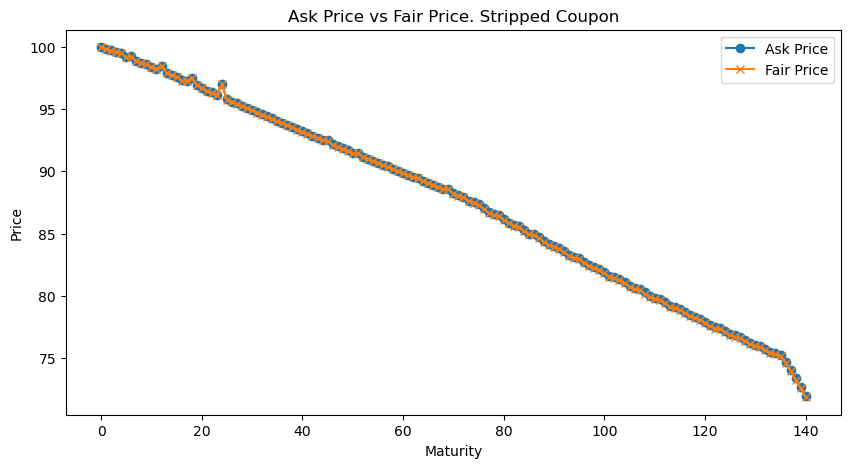

In [17]:
# Plot Stripped Coupon
df1 = df[df['Ticker'] == 'S']
plt.figure(figsize=(10,5))
plt.plot(df1.index, df1['Ask Price'], marker='o', label='Ask Price')
plt.plot(df1.index, df1['Fair Price'], marker='x', label='Fair Price')
plt.title('Ask Price vs Fair Price. Stripped Coupon')
plt.xlabel('Maturity')
plt.ylabel('Price')
plt.legend()
plt.show()

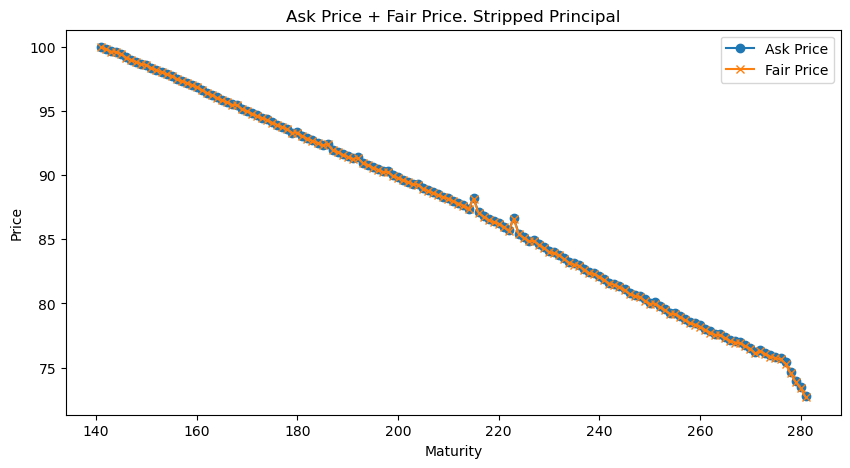

In [18]:
# Plot Stripped Principal
df2 = df[df['Ticker'] == 'SP']
plt.figure(figsize=(10,5))
plt.plot(df2.index, df2['Ask Price'], marker='o', label='Ask Price')
plt.plot(df2.index, df2['Fair Price'], marker='x', label='Fair Price')
plt.title('Ask Price + Fair Price. Stripped Principal')
plt.xlabel('Maturity')
plt.ylabel('Price')
plt.legend()
plt.show()

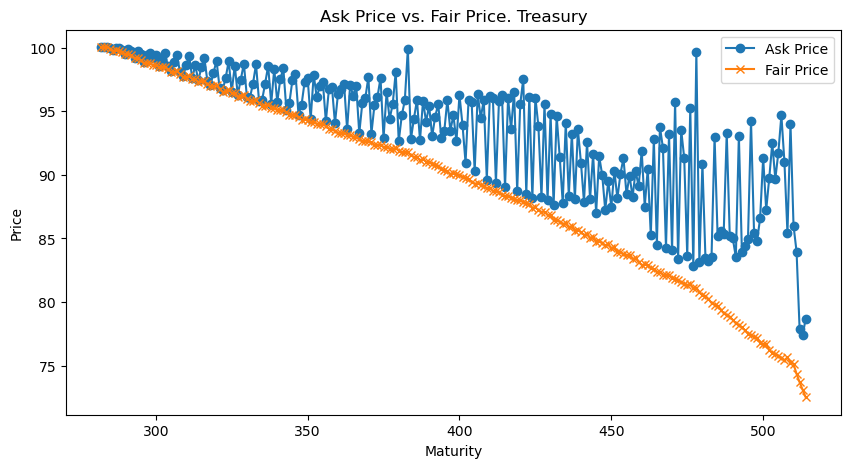

In [19]:
# Plot Treasury
df3 = df[df['Ticker'] == 'T']
plt.figure(figsize=(10,5))
plt.plot(df3.index, df3['Ask Price'], marker='o', label='Ask Price')
plt.plot(df3.index, df3['Fair Price'], marker='x', label='Fair Price')
plt.title('Ask Price vs. Fair Price. Treasury')
plt.xlabel('Maturity')
plt.ylabel('Price')
plt.legend()
plt.show()

### Conclusion: 
#### Based on the graphs above, we conclude that stripped coupons and stripped principals are priced at a fair value, while the treasury is 'overpriced.'
#### We need to find the right proportion to combine stripped coupons and principal put them back together, and sell them as one bond. We will make the difference between market price and 'fair value', which based on the last graph can be as much as $10+.  